In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

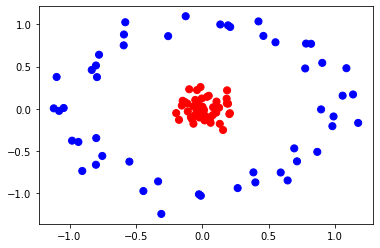

In [2]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [4]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [5]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.55

In [6]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


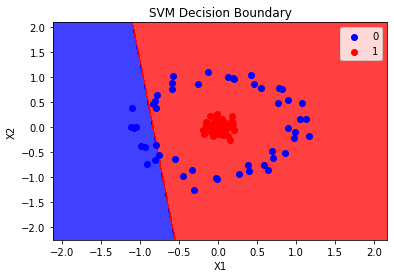

In [7]:
plot_decision_boundary(X, y, classifier)

In [8]:
np.exp(-(X ** 2))

array([[0.47336288, 0.76907743],
       [0.70559881, 0.46045786],
       [0.99997578, 0.98551907],
       [0.96652718, 0.99606889],
       [0.99997064, 0.99673999],
       [0.30007395, 0.86781337],
       [0.99930184, 0.99587049],
       [0.9940335 , 0.98442032],
       [0.27649336, 0.97191193],
       [0.526305  , 0.6421938 ],
       [0.99979873, 0.93619328],
       [0.99352233, 0.99973104],
       [0.98846966, 0.99999982],
       [0.97632334, 0.99862993],
       [0.41852615, 0.85582059],
       [0.98797585, 0.99891411],
       [0.95962304, 0.99595039],
       [0.99932993, 0.35609084],
       [0.99719493, 0.99475587],
       [0.99999294, 0.9994405 ],
       [0.99020749, 0.94813952],
       [0.73940316, 0.67372693],
       [0.38205527, 0.86582579],
       [0.28625558, 0.99998382],
       [0.30886057, 0.79384587],
       [0.38397931, 0.95786227],
       [0.312513  , 0.99931405],
       [0.99992344, 0.99002547],
       [0.60222903, 0.67683462],
       [0.99618125, 0.97245018],
       [0.

In [9]:
np.exp(-(X ** 2)).sum(1)

array([1.24244031, 1.16605667, 1.98549486, 1.96259607, 1.99671063,
       1.16788732, 1.99517233, 1.97845382, 1.24840529, 1.1684988 ,
       1.93599201, 1.99325337, 1.98846948, 1.97495327, 1.27434675,
       1.98688996, 1.95557344, 1.35542077, 1.9919508 , 1.99943344,
       1.93834701, 1.41313009, 1.24788106, 1.28623941, 1.10270643,
       1.34184158, 1.31182705, 1.98994891, 1.27906365, 1.96863142,
       1.99264157, 1.9761869 , 1.95057158, 1.34725658, 1.95113255,
       1.27016437, 1.98170825, 1.98820528, 1.18704769, 1.31827068,
       1.98058914, 1.02060091, 1.20939316, 1.95513229, 1.99161829,
       1.45025041, 1.959171  , 1.11901904, 1.96943342, 1.34558477,
       1.98349896, 1.33937669, 1.40178704, 1.96421731, 1.98637847,
       1.34374712, 1.41357415, 1.91986789, 1.42758845, 1.99961943,
       1.99164788, 1.30471607, 1.41201833, 1.97929061, 1.98234095,
       1.28413459, 1.98311062, 1.36894446, 1.98707846, 1.09454232,
       1.98133849, 1.36956482, 1.99459563, 1.22498503, 1.98420

In [10]:
np.exp(-(X ** 2)).sum()

162.49707409849634

In [11]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3DSubplot:xlabel='X1', ylabel='X2'>

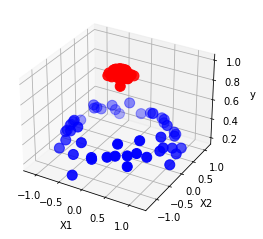

In [12]:
plot_3d_plot(X,y)

In [13]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [14]:
accuracy_score(y_test, y_pred)

1.0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


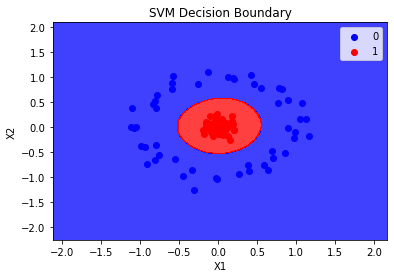

In [15]:
plot_decision_boundary(X, y, rbf_classifier)

In [16]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [17]:
accuracy_score(y_test, y_pred)

1.0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


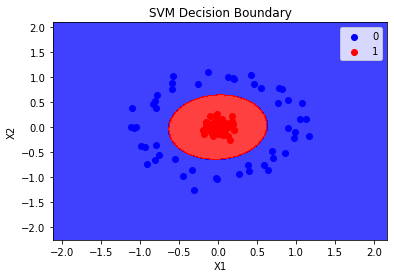

In [18]:
plot_decision_boundary(X, y, poly_classifier)

In [19]:
X

array([[ 8.64808063e-01, -5.12409628e-01],
       [-5.90515414e-01,  8.80644046e-01],
       [-4.92136613e-03,  1.20775814e-01],
       [ 1.84515194e-01,  6.27603047e-02],
       [ 5.41893741e-03, -5.71430893e-02],
       [-1.09714462e+00,  3.76534989e-01],
       [-2.64274211e-02, -6.43277270e-02],
       [-7.73586869e-02, -1.25308890e-01],
       [ 1.13382913e+00,  1.68790064e-01],
       [-8.01170635e-01, -6.65481143e-01],
       [-1.41877513e-02,  2.56774858e-01],
       [ 8.06147633e-02,  1.64011817e-02],
       [ 1.07690888e-01,  4.26450812e-04],
       [-1.54794884e-01,  3.70271811e-02],
       [-9.33282323e-01, -3.94581443e-01],
       [-1.09986482e-01, -3.29617731e-02],
       [ 2.03014127e-01, -6.37010810e-02],
       [-2.58900338e-02, -1.01615423e+00],
       [-5.30001113e-02, -7.25115427e-02],
       [-2.65692144e-03,  2.36570496e-02],
       [-9.92006552e-02,  2.30767446e-01],
       [-5.49465151e-01, -6.28434885e-01],
       [-9.80912840e-01, -3.79567586e-01],
       [-1.

In [20]:
X_new=np.exp(-(X**2))

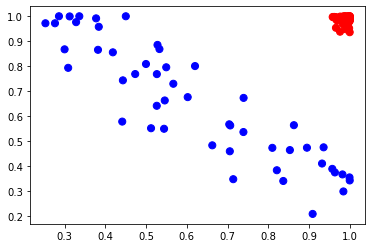

In [21]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')